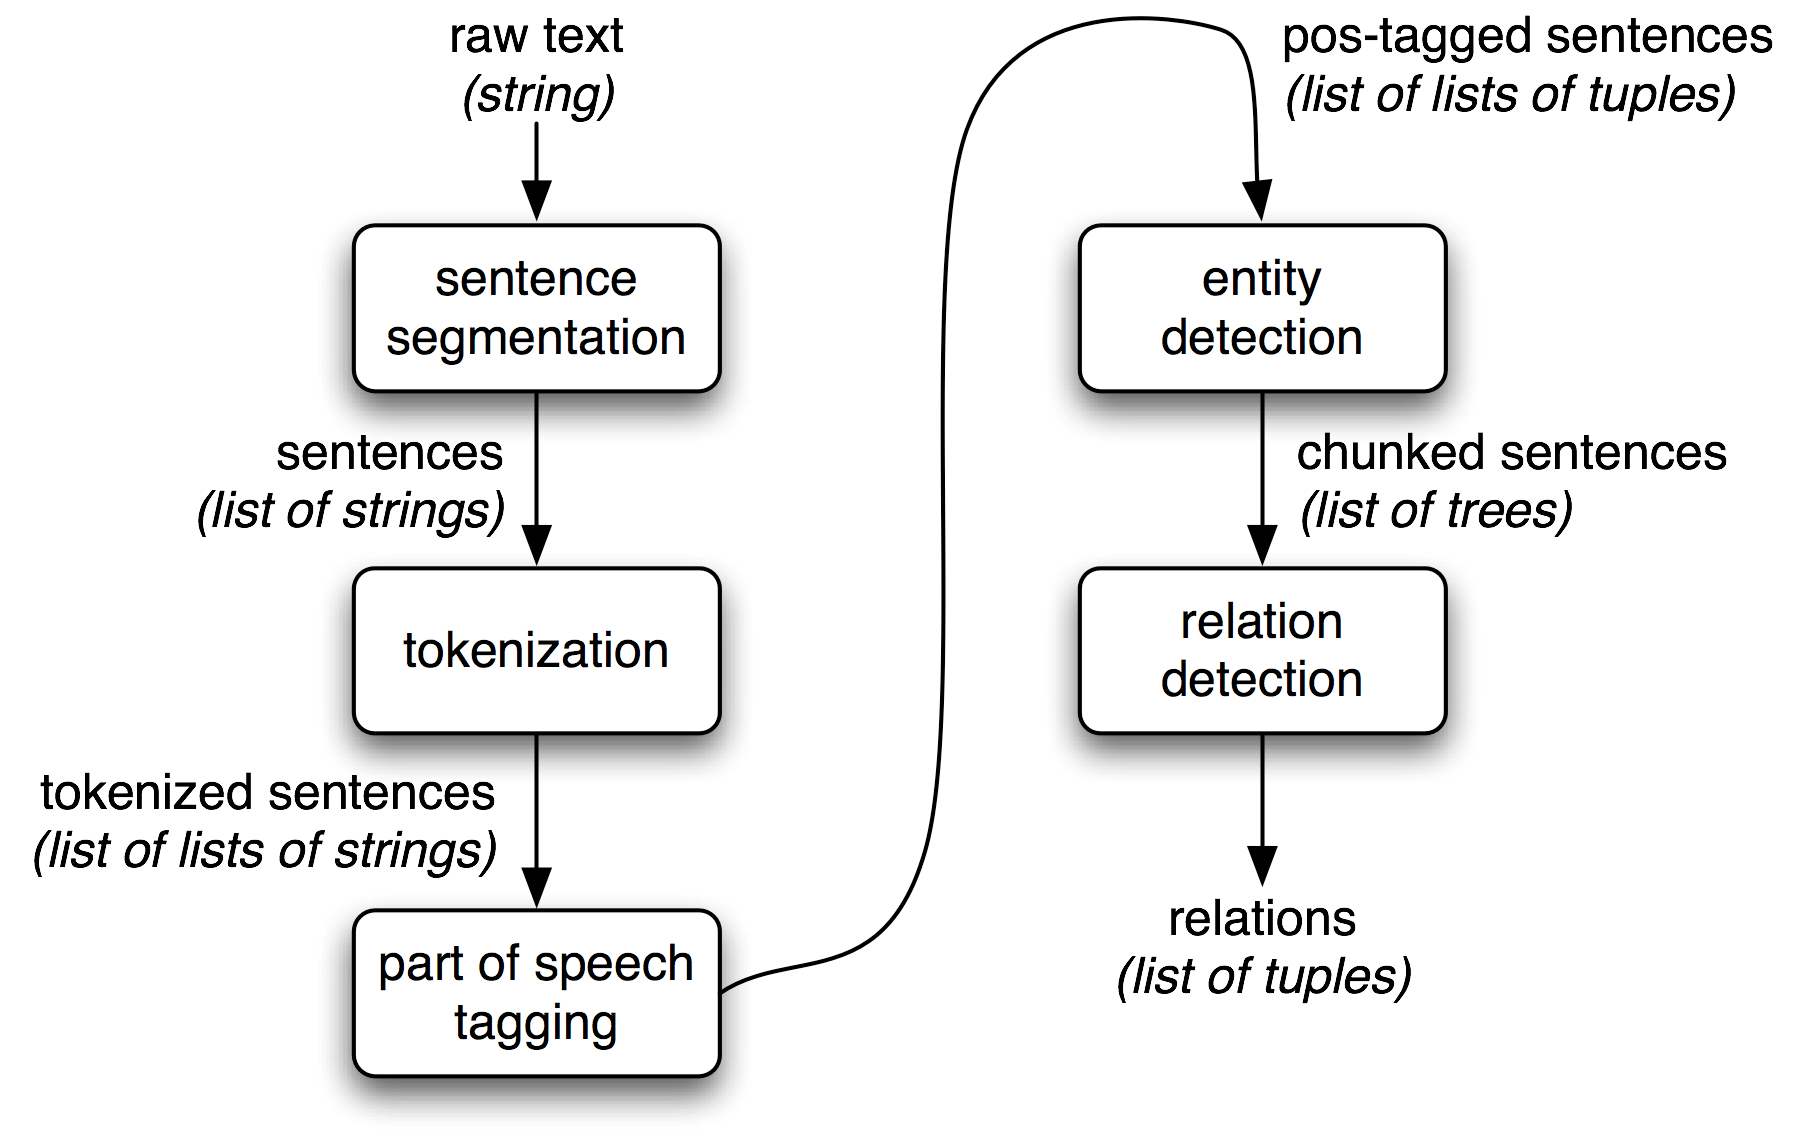

In [2]:
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

## Chunking

In [3]:
sentence = "the little yellow dog barked at the cat"
sent_pos = nltk.pos_tag(nltk.word_tokenize(sentence))
sent_pos

[('the', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('cat', 'NN')]

In [22]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

In [12]:
cp = nltk.RegexpParser(grammar)
result = cp.parse(sent_pos)
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


## Try yourself
Modify the regular expression (Tag pattern) to cover the following NPs

* another/DT sharp/JJ dive/NN
* trade/NN figures/NNS
* any/DT new/JJ policy/NN measures/NNS
* earlier/JJR stages/NNS
* Panamanian/JJ dictator/NN Manuel/NNP Noriega/NNP

In [24]:
sentence = "another sharp dive trade figures any new policy measures earlier stages Panamanian dictator Manuel Noriega"

tokens = nltk.word_tokenize(sentence)
pos_tags = nltk.pos_tag(tokens)

grammar = r"NP: {<DT>?<JJ.*>*<NN.*>+<NNP>*}"

cp = nltk.RegexpParser(grammar)
result = cp.parse(pos_tags)
print(result)

(S
  (NP another/DT sharp/JJ dive/JJ trade/NN figures/NNS)
  (NP any/DT new/JJ policy/NN measures/NNS)
  earlier/RBR
  (NP stages/NNS)
  (NP Panamanian/JJ dictator/NN Manuel/NNP Noriega/NNP))


In [29]:
new_sentence = """When Superman gets drawn into conflicts at home and abroad, his actions are questioned,
                  giving tech billionaire Lex Luthor the opportunity to get the Man of Steel out of the way for good."""

new_sent_pos = nltk.pos_tag(nltk.word_tokenize(new_sentence))

result = cp.parse(new_sent_pos)
print(result)

(S
  When/WRB
  (NP Superman/NNP)
  gets/VBZ
  drawn/VBN
  into/IN
  (NP conflicts/NNS)
  at/IN
  (NP home/NN)
  and/CC
  abroad/RB
  ,/,
  his/PRP$
  (NP actions/NNS)
  are/VBP
  questioned/VBN
  ,/,
  giving/VBG
  (NP tech/NN billionaire/NN Lex/NNP Luthor/NNP)
  (NP the/DT opportunity/NN)
  to/TO
  get/VB
  (NP the/DT Man/NNP)
  of/IN
  (NP Steel/NNP)
  out/IN
  of/IN
  (NP the/DT way/NN)
  for/IN
  good/JJ
  ./.)


## Identifying Chunks from tagged corpus

In [18]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [19]:
cp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')
brown = nltk.corpus.brown
for sent in brown.tagged_sents():
  tree = cp.parse(sent)
  for subtree in tree.subtrees():
    if subtree.label() == 'CHUNK': print(subtree)

(CHUNK combined/VBN to/TO achieve/VB)
(CHUNK continue/VB to/TO place/VB)
(CHUNK serve/VB to/TO protect/VB)
(CHUNK wanted/VBD to/TO wait/VB)
(CHUNK allowed/VBN to/TO place/VB)
(CHUNK expected/VBN to/TO become/VB)
(CHUNK expected/VBN to/TO approve/VB)
(CHUNK expected/VBN to/TO make/VB)
(CHUNK intends/VBZ to/TO make/VB)
(CHUNK seek/VB to/TO set/VB)
(CHUNK like/VB to/TO see/VB)
(CHUNK designed/VBN to/TO provide/VB)
(CHUNK get/VB to/TO hear/VB)
(CHUNK expects/VBZ to/TO tell/VB)
(CHUNK expected/VBN to/TO give/VB)
(CHUNK prefer/VB to/TO pay/VB)
(CHUNK required/VBN to/TO obtain/VB)
(CHUNK permitted/VBN to/TO teach/VB)
(CHUNK designed/VBN to/TO reduce/VB)
(CHUNK Asked/VBN to/TO elaborate/VB)
(CHUNK got/VBN to/TO go/VB)
(CHUNK raised/VBN to/TO pay/VB)
(CHUNK scheduled/VBN to/TO go/VB)
(CHUNK cut/VBN to/TO meet/VB)
(CHUNK needed/VBN to/TO meet/VB)
(CHUNK hastened/VBD to/TO add/VB)
(CHUNK found/VBN to/TO prevent/VB)
(CHUNK continue/VB to/TO insist/VB)
(CHUNK compelled/VBN to/TO make/VB)
(CHUNK mad

## Try it

Write a function that will take a chunk pattern as input and find all the chunks from the corpus

##  Building Nested Structure with Cascaded Chunkers

In [39]:
grammar = r"""
  NP: {<DT|JJ|NN.*>+}          # Chunk sequences of DT, JJ, NN
  PP: {<IN><NP>}               # Chunk prepositions followed by NP
  VP: {<VB.*><NP|PP|CLAUSE>+$} # Chunk verbs and their arguments
  CLAUSE: {<NP><VP>}           # Chunk NP, VP
  """
cp = nltk.RegexpParser(grammar)

In [40]:
sentence = "john thinks mary saw the cat sit on the mat"
sent_pos = nltk.pos_tag(nltk.word_tokenize(sentence))
print(cp.parse(sent_pos))

(S
  (NP john/NN)
  thinks/VBZ
  (CLAUSE
    (NP mary/JJ)
    (VP
      saw/VBD
      (NP the/DT cat/NN sit/NN)
      (PP on/IN (NP the/DT mat/NN)))))


Unfortunately this result misses the VP headed by saw. The solution to these problems is to get the chunker to loop over its patterns: after trying all of them, it repeats the process. We add an optional second argument loop to specify the number of times the set of patterns should be run:

In [41]:
cp = nltk.RegexpParser(grammar, loop=2)
print(cp.parse(sent_pos))

(S
  (CLAUSE
    (NP john/NN)
    (VP
      thinks/VBZ
      (CLAUSE
        (NP mary/JJ)
        (VP
          saw/VBD
          (NP the/DT cat/NN sit/NN)
          (PP on/IN (NP the/DT mat/NN)))))))


## Representing Chunks/NE:IOB Tags

 In this scheme, each token is tagged with one of three special chunk tags, I (inside), O (outside), or B (begin). A token is tagged as B if it marks the beginning of a chunk. Subsequent tokens within the chunk are tagged I. All other tokens are tagged O. The B and I tags are suffixed with the chunk type, e.g. B-NP, I-NP.

 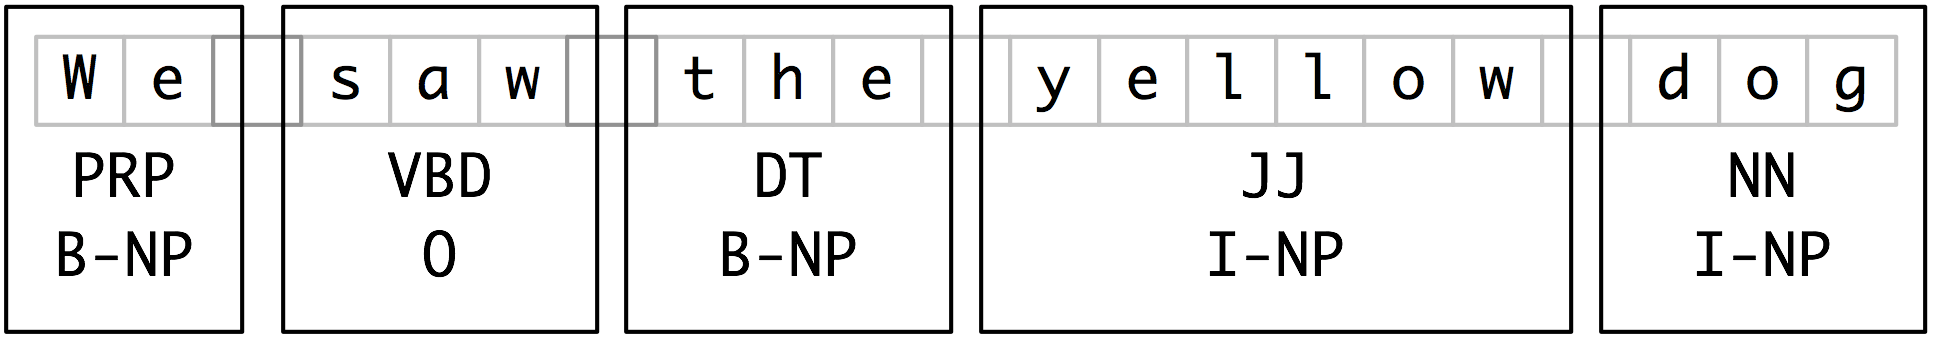

In [42]:
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
from nltk.chunk import tree2conlltags

In [43]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('maxent_ne_chunker_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [44]:
sentence = "Barack Obama was born in Hawaii."

In [45]:
tokens = word_tokenize(sentence)
pos_tags = pos_tag(tokens)
ne_tree = ne_chunk(pos_tags)

In [46]:
iob_tags = tree2conlltags(ne_tree)

In [47]:
for word, pos, iob in iob_tags:
    print(f"{word}\t{pos}\t{iob}")

Barack	NNP	B-PERSON
Obama	NNP	B-PERSON
was	VBD	O
born	VBN	O
in	IN	O
Hawaii	NNP	B-GPE
.	.	O


## Relation Extraction

Once named entities have been identified in a text, we then want to extract the relations that exist between them. As indicated earlier, we will typically be looking for relations between specified types of named entity.

In [48]:
import re
nltk.download('ieer')

[nltk_data] Downloading package ieer to /root/nltk_data...
[nltk_data]   Unzipping corpora/ieer.zip.


True

In [49]:
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
  for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,corpus='ieer', pattern = IN):
    print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


## Try the pipeline

In [50]:
text = "Google was founded in California. Microsoft is based in Redmond. The UN headquarters are in New York."

In [51]:
tokens = nltk.word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)

In [52]:
#define chunk grammar

grammar = r"""
  NP: {<DT>?<JJ>*<NNP>+}
  # VP: {<TODO>}
"""

In [53]:
cp = nltk.RegexpParser(grammar)
chunk_tree = cp.parse(pos_tags)

In [54]:
iob_tags = tree2conlltags(chunk_tree)

print("\nIOB Tags:")
for word, pos, iob in iob_tags:
    print(f"{word}\t{pos}\t{iob}")


IOB Tags:
Google	NNP	B-NP
was	VBD	O
founded	VBN	O
in	IN	O
California	NNP	B-NP
.	.	O
Microsoft	NNP	B-NP
is	VBZ	O
based	VBN	O
in	IN	O
Redmond	NNP	B-NP
.	.	O
The	DT	B-NP
UN	NNP	I-NP
headquarters	NNS	O
are	VBP	O
in	IN	O
New	NNP	B-NP
York	NNP	I-NP
.	.	O


In [70]:
## Perform NER

ne_tree = ne_chunk(pos_tags)

print("\nNamed Entities:")
print(ne_tree)



Named Entities:
(S
  (PERSON Google/NNP)
  was/VBD
  founded/VBN
  in/IN
  (GPE California/NNP)
  ./.
  (PERSON Microsoft/NNP)
  is/VBZ
  based/VBN
  in/IN
  (GPE Redmond/NNP)
  ./.
  The/DT
  (ORGANIZATION UN/NNP)
  headquarters/NNS
  are/VBP
  in/IN
  (GPE New/NNP York/NNP)
  ./.)


In [66]:
## Relation Extraction

doc = nltk.corpus.ieer.parsed_docs('NYT_19980315')[0]

print("\nORG–LOC Relations found in IEER doc:")
#write your code
for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, corpus='ieer', pattern=IN):
    print(nltk.sem.rtuple(rel))


ORG–LOC Relations found in IEER doc:
[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']


In [67]:
## Relation Extraction

docs = nltk.corpus.ieer.parsed_docs('NYT_19980315')

print("\nORG–LOC Relations found in IEER doc:")
#write your code
for doc in docs:
  for rel in nltk.sem.extract_rels('ORG', 'LOC', doc, corpus='ieer', pattern=IN):
      print(nltk.sem.rtuple(rel))


ORG–LOC Relations found in IEER doc:
[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']
